In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0  0.809524          0.285714       0.286171           0.428571   
1  0.428571          0.000000       0.147183           0.214286   
2  0.166667          0.535714       0.144644           1.000000   
3  0.357143          0.142857       0.068878           0.214286   
4  0.309524          0.285714       0.204325           0.071429   

   StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0          0.000000               0.333333            0.40   
1          0.333333               0.500000            0.05   
2          0.333333               0.666667            0.05   
3          0.000000               0.166667            0.15   
4          0.000000               0.333333            0.50   

   YearsInCurrentRole  MonthlyHours  Attrition  OverTime  OverallSatisfaction  \
0              0.4375      0.231122        0.0       0.0             0.333333   
1              0.5000      0.233476        0.0       1.0             0.333333   
2              0.3125      0.747017        0.0       1.0             0.666667   
3              0.4375      0.435214        0.0       0.0             0.333333   
4              0.1250      0.142192        0.0       0.0             0.666667   

   JobLevel  NumCompaniesWorked  Education  
0      0.50            1.000000       0.75  
1      1.00            0.111111       0.00  
2      0.25            0.111111       0.50  
3      0.00            0.222222       0.75  
4      0.00            0.111111       0.25

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

In [6]:
df.describe()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
count  883.000000        883.000000     883.000000         883.000000   
mean     0.441784          0.292914       0.227927           0.300518   
std      0.196813          0.294351       0.209842           0.256381   
min      0.000000          0.000000       0.000000           0.000000   
25%      0.285714          0.035714       0.079383           0.071429   
50%      0.404762          0.214286       0.156611           0.214286   
75%      0.571429          0.464286       0.301351           0.500000   
max      1.000000          1.000000       1.000000           1.000000   

       StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
count        883.000000             883.000000      883.000000   
mean           0.264628               0.444319        0.316308   
std            0.288454               0.197971        0.226178   
min            0.000000               0.000000        0.000000   
25%            0.000000               0.333333        0.150000   
50%            0.333333               0.333333        0.250000   
75%            0.333333               0.500000        0.450000   
max            1.000000               1.000000        1.000000   

       YearsInCurrentRole  MonthlyHours   Attrition    OverTime  \
count          883.000000    883.000000  883.000000  883.000000   
mean             0.244975      0.368545    0.173273    0.277463   
std              0.214712      0.230461    0.378698    0.448001   
min              0.000000      0.000000    0.000000    0.000000   
25%              0.125000      0.185135    0.000000    0.000000   
50%              0.187500      0.329663    0.000000    0.000000   
75%              0.437500      0.502469    0.000000    1.000000   
max              1.000000      1.000000    1.000000    1.000000   

       OverallSatisfaction    JobLevel  NumCompaniesWorked   Education  
count           883.000000  883.000000          883.000000  883.000000  
mean              0.440921    0.229898            0.315213    0.471687  
std               0.178532    0.251877            0.276110    0.252071  
min               0.000000    0.000000            0.000000    0.000000  
25%               0.333333    0.000000            0.111111    0.250000  
50%               0.333333    0.250000            0.222222    0.500000  
75%               0.666667    0.250000            0.444444    0.750000  
max               1.000000    1.000000            1.000000    1.000000

In [7]:
# Convert the DataFrame to a numpy array:
train_data = df.values

In [8]:
train_data

array([[0.80952381, 0.28571429, 0.28617054, ..., 0.5       , 1.        ,
        0.75      ],
       [0.42857143, 0.        , 0.14718332, ..., 1.        , 0.11111111,
        0.        ],
       [0.16666667, 0.53571429, 0.14464368, ..., 0.25      , 0.11111111,
        0.5       ],
       ...,
       [0.35714286, 0.17857143, 0.15922734, ..., 0.25      , 0.44444444,
        0.75      ],
       [0.35714286, 0.10714286, 0.05737263, ..., 0.25      , 0.11111111,
        0.        ],
       [0.64285714, 0.07142857, 0.12990611, ..., 0.25      , 0.33333333,
        0.75      ]])

In [9]:
type(train_data)

numpy.ndarray

<h3>K-means</h3>

We run the k-means algorithm with a range of k from 2 to 50 to find the optimal k, depending on four measures: Sum of Squared Error, Silhouette Score, Calinski-Harabaz Score and Davies-Bouldin Score.

* <b>Sum of Squared Error</b>
    Sum of squared distances of samples to their closest cluster center.

* <b>Silhouette Score</b>
    Compute the mean Silhouette Coefficient of all samples.
    The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
    This function returns the mean Silhouette Coefficient over all samples. 
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
    
* <b>Calinski and Harabasz score</b>
    It is also known as the Variance Ratio Criterion.
    The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.
    
* <b>Davies-Bouldin score</b>
   The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.

k:  2 SSE:  773.1409630208582 Silhouette Score:  0.22872714027529595 
 Calinski-Harabaz:  211.60486514219534 Davies-Bouldin:  1.8097939823297429

k:  3 SSE:  685.477304683376 Silhouette Score:  0.22265364451439684 
 Calinski-Harabaz:  175.46803402329414 Davies-Bouldin:  1.633795466992359

k:  4 SSE:  644.1664921860465 Silhouette Score:  0.14419898286923807 
 Calinski-Harabaz:  143.12943181130413 Davies-Bouldin:  2.1039357173419595

k:  5 SSE:  605.6241880393121 Silhouette Score:  0.1634865146293548 
 Calinski-Harabaz:  128.0179310197539 Davies-Bouldin:  2.013176547159732

k:  6 SSE:  574.602846507281 Silhouette Score:  0.14986777076290242 
 Calinski-Harabaz:  117.28989001638035 Davies-Bouldin:  2.085040718258984

k:  7 SSE:  552.8874937390062 Silhouette Score:  0.14189507025915388 
 Calinski-Harabaz:  107.19900515416968 Davies-Bouldin:  2.049087517254951

k:  8 SSE:  538.183774172988 Silhouette Score:  0.13410737862829947 
 Calinski-Harabaz:  97.7026160017688 Davies-Bouldin:  2.0201955

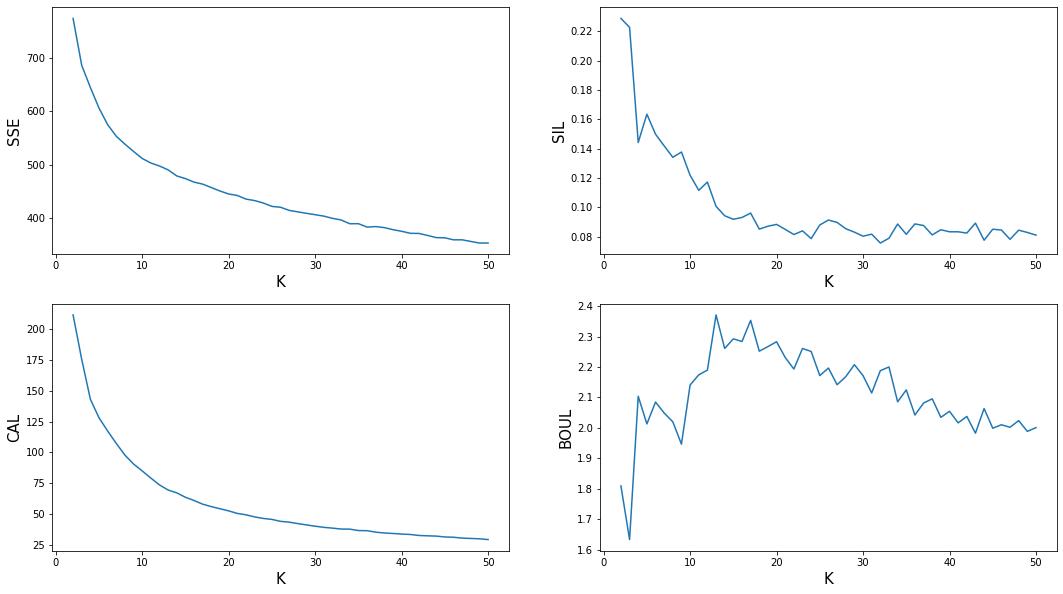

In [10]:
max_k = 50
sse_list = list()
silhouette = list()
calinski = list()
bouldin = list()
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
    
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
    kmeans.fit(train_data)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    sil = silhouette_score(train_data, kmeans.labels_)
    silhouette.append(sil)
    
    cal = calinski_harabasz_score(train_data, kmeans.labels_)
    calinski.append(cal)
    
    boul = davies_bouldin_score(train_data, kmeans.labels_)
    bouldin.append(boul)
    
    print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil, "\n",
         "Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
    print()
        
ax[0, 0].plot(range(2, len(sse_list) + 2), sse_list)
ax[0, 0].set_ylabel('SSE', fontsize=15)
ax[0, 0].set_xlabel('K', fontsize=15)
    
ax[0, 1].plot(range(2, len(silhouette) + 2), silhouette)
ax[0, 1].set_ylabel('SIL', fontsize=15)
ax[0, 1].set_xlabel('K', fontsize=15)
    
ax[1, 0].plot(range(2, len(calinski) + 2), calinski)
ax[1, 0].set_ylabel('CAL', fontsize=15)
ax[1, 0].set_xlabel('K', fontsize=15)
    
ax[1, 1].plot(range(2, len(bouldin) + 2), bouldin)
ax[1, 1].set_ylabel('BOUL', fontsize=15)
ax[1, 1].set_xlabel('K', fontsize=15)
    
plt.show()
fig.tight_layout()

In [11]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('Labels: ', dict(zip(bins, hist)))
print()
print ('SSE: ', kmeans.inertia_)
print ('Silhouette Score: ', silhouette_score(train_data, kmeans.labels_))
print ("Calinski - Harabaz Score: ", calinski_harabasz_score(train_data, kmeans.labels_))
print ("Davies - Bouldin Score: ", davies_bouldin_score(train_data, kmeans.labels_))

centers [[ 4.40178571e-01  3.43750000e-01  2.36840080e-01  2.87500000e-01
   1.91666667e-01  4.08333333e-01  3.63125000e-01  1.46875000e-01
   3.58997858e-01  1.00000000e+00  1.00000000e+00  3.87500000e-01
   1.28125000e-01  3.12500000e-01  4.37500000e-01]
 [ 4.31601732e-01  2.53030303e-01  2.23233567e-01  2.82683983e-01
   2.94949495e-01  4.29292929e-01  3.07575758e-01  2.83712121e-01
   3.48811512e-01 -8.32667268e-17  1.00000000e+00  4.82828283e-01
   2.93939394e-01  2.80808081e-01  4.86363636e-01]
 [ 4.42270059e-01  3.05283757e-01  2.28372526e-01  2.70058708e-01
   1.41552511e-01  4.33789954e-01  3.48630137e-01  1.57534247e-01
   3.84290537e-01  1.00000000e+00  5.55111512e-17  3.56164384e-01
   1.47260274e-01  3.47031963e-01  4.72602740e-01]
 [ 4.45317840e-01  1.38328776e-01  2.28218324e-01  3.22795625e-01
   2.58373206e-01  4.60925040e-01  3.10645933e-01  2.49551435e-01
   3.81664446e-01  3.88578059e-16  2.22044605e-16  4.45773525e-01
   2.33253589e-01  3.27751196e-01  4.74282297e-

In [12]:
diz_kmeans_5_tot = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_5_tot['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_5_tot['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_5_tot['sse'] = float(kmeans.inertia_)
diz_kmeans_5_tot['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))
diz_kmeans_5_tot['calinski'] = float(calinski_harabasz_score(train_data, kmeans.labels_))
diz_kmeans_5_tot['bbouldin'] = float(davies_bouldin_score(train_data, kmeans.labels_))

In [13]:
with open('diz_kmeans_5_tot.json', 'w') as fp:
    json.dump(diz_kmeans_5_tot, fp, indent=4)

In [14]:
df['Labels'] = kmeans.labels_

In [15]:
df

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0    0.809524          0.285714       0.286171           0.428571   
1    0.428571          0.000000       0.147183           0.214286   
2    0.166667          0.535714       0.144644           1.000000   
3    0.357143          0.142857       0.068878           0.214286   
4    0.309524          0.285714       0.204325           0.071429   
..        ...               ...            ...                ...   
878  0.476190          0.392857       0.166769           0.285714   
879  0.452381          0.535714       0.042558           0.142857   
880  0.357143          0.178571       0.159227           0.500000   
881  0.357143          0.107143       0.057373           0.071429   
882  0.642857          0.071429       0.129906           0.357143   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0            0.000000               0.333333            0.40   
1            0.333333               0.500000            0.05   
2            0.333333               0.666667            0.05   
3            0.000000               0.166667            0.15   
4            0.000000               0.333333            0.50   
..                ...                    ...             ...   
878          0.000000               0.333333            0.50   
879          0.666667               0.500000            0.85   
880          0.000000               0.333333            0.55   
881          0.000000               0.333333            0.15   
882          0.000000               0.333333            0.50   

     YearsInCurrentRole  MonthlyHours  Attrition  OverTime  \
0                0.4375      0.231122        0.0       0.0   
1                0.5000      0.233476        0.0       1.0   
2                0.3125      0.747017        0.0       1.0   
3                0.4375      0.435214        0.0       0.0   
4                0.1250      0.142192        0.0       0.0   
..                  ...           ...        ...       ...   
878              0.0000      0.453907        1.0       0.0   
879              0.0000      0.088947        0.0       1.0   
880              0.4375      0.436931        1.0       1.0   
881              0.1250      0.323273        0.0       0.0   
882              0.2500      0.325150        0.0       1.0   

     OverallSatisfaction  JobLevel  NumCompaniesWorked  Education  Labels  
0               0.333333      0.50            1.000000       0.75       3  
1               0.333333      1.00            0.111111       0.00       1  
2               0.666667      0.25            0.111111       0.50       1  
3               0.333333      0.00            0.222222       0.75       3  
4               0.666667      0.00            0.111111       0.25       3  
..                   ...       ...                 ...        ...     ...  
878             0.666667      0.00            0.111111       0.50       2  
879             0.666667      0.00            0.111111       0.25       1  
880             0.333333      0.25            0.444444       0.75       0  
881             0.333333      0.25            0.111111       0.00       3  
882             0.333333      0.25            0.333333       0.75       1  

[883 rows x 16 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
 15  Labels

In [17]:
np.unique(df['Labels'])

array([0, 1, 2, 3, 4], dtype=int32)

In [18]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 80, 165,  73, 418, 147]))

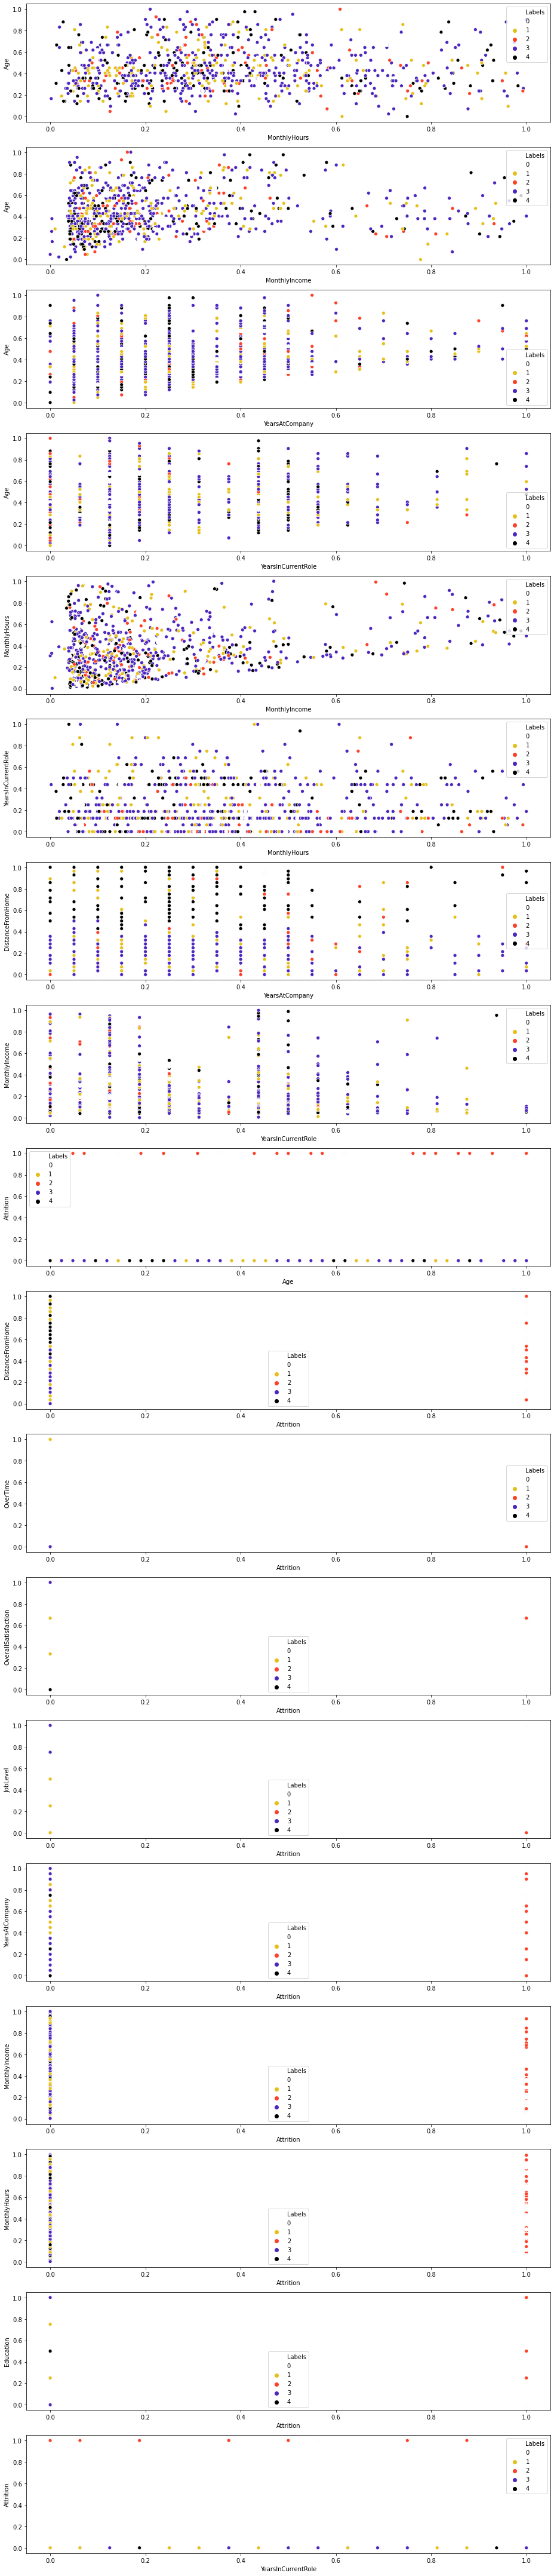

In [19]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,
     ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(18, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'DistanceFromHome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)

sns.scatterplot(x = 'Age', y = 'Attrition', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax9)

sns.scatterplot(x = 'Attrition', y = 'DistanceFromHome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax10)

sns.scatterplot(x = 'Attrition', y = 'OverTime', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax11)

sns.scatterplot(x = 'Attrition', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax12)

sns.scatterplot(x = 'Attrition', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax13)

sns.scatterplot(x = 'Attrition', y = 'YearsAtCompany', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax14)

sns.scatterplot(x = 'Attrition', y = 'MonthlyIncome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax15)

sns.scatterplot(x = 'Attrition', y = 'MonthlyHours', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax16)

sns.scatterplot(x = 'Attrition', y = 'Education', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax17)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Attrition', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax18)

plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [20]:
scaler = MinMaxScaler()

In [21]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [22]:
df_NON_normalized

Age  Attrition  BusinessTravel_Non-Travel  BusinessTravel_Travel_Rarely  \
0     52          0                          0                             1   
1     36          0                          0                             1   
2     25          0                          0                             0   
3     33          0                          0                             1   
4     31          0                          0                             1   
..   ...        ...                        ...                           ...   
878   38          1                          0                             1   
879   37          0                          0                             1   
880   33          1                          1                             0   
881   33          0                          0                             1   
882   45          0                          1                             0   

     BusinessTravel_Travel_Frequently  DistanceFromHome  Education  \
0                                   0                 9          4   
1                                   0                 1          1   
2                                   1                16          3   
3                                   0                 5          4   
4                                   0                 9          2   
..                                ...               ...        ...   
878                                 0                12          3   
879                                 0                16          2   
880                                 0                 6          4   
881                                 0                 4          1   
882                                 0                 3          4   

     EnvironmentSatisfaction  Gender  JobInvolvement  ...  PercentSalaryHike  \
0                          2       0               3  ...                 17   
1                          2       0               3  ...                 14   
2                          3       0               3  ...                 25   
3                          2       0               3  ...                 14   
4                          3       1               3  ...                 12   
..                       ...     ...             ...  ...                ...   
878                        3       1               4  ...                 15   
879                        4       1               4  ...                 13   
880                        2       1               1  ...                 18   
881                        3       0               2  ...                 12   
882                        1       0               3  ...                 16   

     RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                           3                 0                      2   
1                           3                 1                      3   
2                           3                 1                      4   
3                           2                 0                      1   
4                           3                 0                      2   
..                        ...               ...                    ...   
878                         4                 0                      2   
879                         2                 2                      3   
880                         2                 0                      2   
881                         1                 0                      2   
882                         4                 0                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  MonthlyHours  \
0                  2               8                   7        156.61   
1                  3               1                   8        157.94   
2                  3               1                   5        448.06   
3                  3               3                   7 

In [23]:
df_NN = pd.DataFrame()

col_to_add = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',      
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyHours', 'Attrition',              
            'OverTime', 'OverallSatisfaction', 'JobLevel', 'NumCompaniesWorked','Education']

for element in col_to_add:
    df_NN[element] = df_NON_normalized[element]
    
df_NN

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0     52                 9           8446                 17   
1     36                 1           4834                 14   
2     25                16           4768                 25   
3     33                 5           2799                 14   
4     31                 9           6319                 12   
..   ...               ...            ...                ...   
878   38                12           5343                 15   
879   37                16           2115                 13   
880   33                 6           5147                 18   
881   33                 4           2500                 12   
882   45                 3           4385                 16   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0                   0                      2               8   
1                   1                      3               1   
2                   1                      4               1   
3                   0                      1               3   
4                   0                      2              10   
..                ...                    ...             ...   
878                 0                      2              10   
879                 2                      3              17   
880                 0                      2              11   
881                 0                      2               3   
882                 0                      2              10   

     YearsInCurrentRole  MonthlyHours  Attrition  OverTime  \
0                     7        156.61          0         0   
1                     8        157.94          0         1   
2                     5        448.06          0         1   
3                     7        271.91          0         0   
4                     2        106.37          0         0   
..                  ...           ...        ...       ...   
878                   0        282.47          1         0   
879                   0         76.29          0         1   
880                   7        272.88          1         1   
881                   2        208.67          0         0   
882                   4        209.73          0         1   

     OverallSatisfaction  JobLevel  NumCompaniesWorked  Education  
0                      2         3                   9          4  
1                      2         5                   1          1  
2                      3         2                   1          3  
3                      2         1                   2          4  
4                      3         1                   1          2  
..                   ...       ...                 ...        ...  
878                    3         1                   1          3  
879                    3         1                   1          2  
880                    2         2                   4          4  
881                    2         2                   1          1  
882                    2         2                   3          4  

[883 rows x 15 columns]

In [24]:
X = scaler.fit_transform(df_NN.values)

In [25]:
print(kmeans.cluster_centers_)

[[ 4.40178571e-01  3.43750000e-01  2.36840080e-01  2.87500000e-01
   1.91666667e-01  4.08333333e-01  3.63125000e-01  1.46875000e-01
   3.58997858e-01  1.00000000e+00  1.00000000e+00  3.87500000e-01
   1.28125000e-01  3.12500000e-01  4.37500000e-01]
 [ 4.31601732e-01  2.53030303e-01  2.23233567e-01  2.82683983e-01
   2.94949495e-01  4.29292929e-01  3.07575758e-01  2.83712121e-01
   3.48811512e-01 -8.32667268e-17  1.00000000e+00  4.82828283e-01
   2.93939394e-01  2.80808081e-01  4.86363636e-01]
 [ 4.42270059e-01  3.05283757e-01  2.28372526e-01  2.70058708e-01
   1.41552511e-01  4.33789954e-01  3.48630137e-01  1.57534247e-01
   3.84290537e-01  1.00000000e+00  5.55111512e-17  3.56164384e-01
   1.47260274e-01  3.47031963e-01  4.72602740e-01]
 [ 4.45317840e-01  1.38328776e-01  2.28218324e-01  3.22795625e-01
   2.58373206e-01  4.60925040e-01  3.10645933e-01  2.49551435e-01
   3.81664446e-01  3.88578059e-16  2.22044605e-16  4.45773525e-01
   2.33253589e-01  3.27751196e-01  4.74282297e-01]
 [ 4

In [26]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [27]:
print(centers)

[[ 3.64875000e+01  1.06250000e+01  7.16400000e+03  1.50250000e+01
   5.75000000e-01  2.45000000e+00  7.26250000e+00  2.35000000e+00
   2.28852250e+02  1.00000000e+00  1.00000000e+00  2.16250000e+00
   1.51250000e+00  2.81250000e+00  2.75000000e+00]
 [ 3.61272727e+01  8.08484848e+00  6.81039394e+03  1.49575758e+01
   8.84848485e-01  2.57575758e+00  6.15151515e+00  4.53939394e+00
   2.23097576e+02 -8.32667268e-17  1.00000000e+00  2.44848485e+00
   2.17575758e+00  2.52727273e+00  2.94545455e+00]
 [ 3.65753425e+01  9.54794521e+00  6.94394521e+03  1.47808219e+01
   4.24657534e-01  2.60273973e+00  6.97260274e+00  2.52054795e+00
   2.43141096e+02  1.00000000e+00  5.55111512e-17  2.06849315e+00
   1.58904110e+00  3.12328767e+00  2.89041096e+00]
 [ 3.67033493e+01  4.87320574e+00  6.93993780e+03  1.55191388e+01
   7.75119617e-01  2.76555024e+00  6.21291866e+00  3.99282297e+00
   2.41657512e+02  3.88578059e-16  2.22044605e-16  2.33732057e+00
   1.93301435e+00  2.94976077e+00  2.89712919e+00]
 [ 3

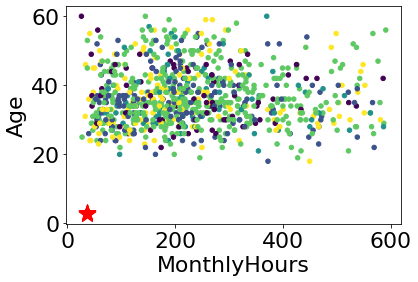

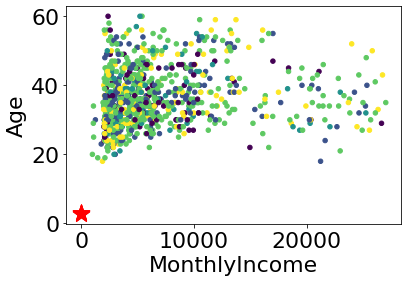

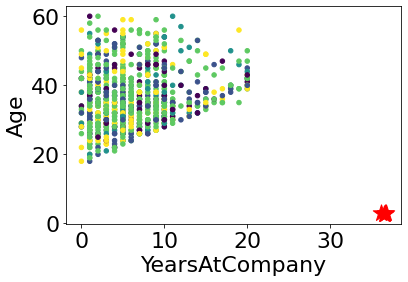

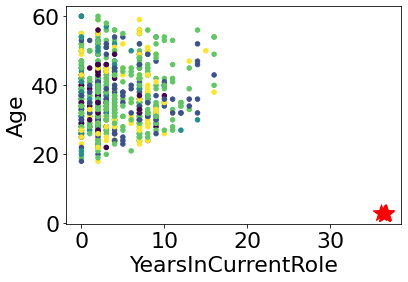

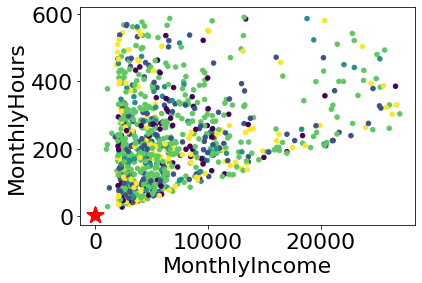

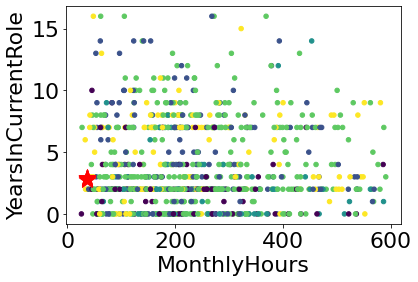

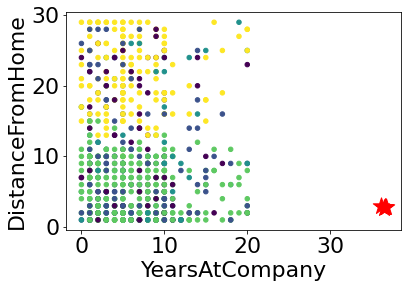

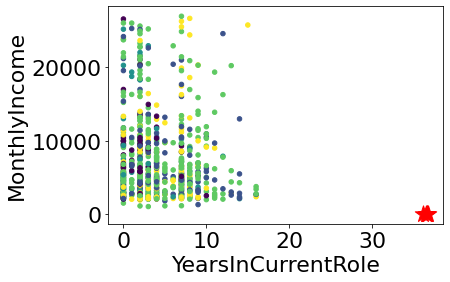

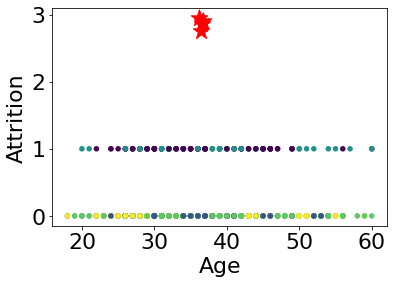

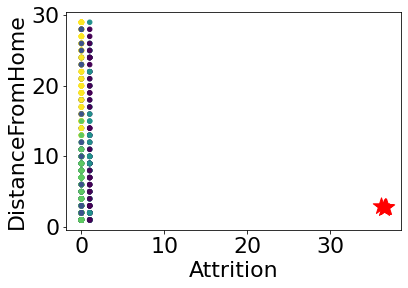

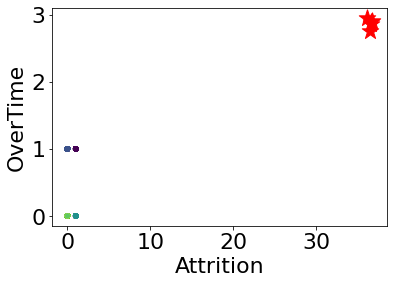

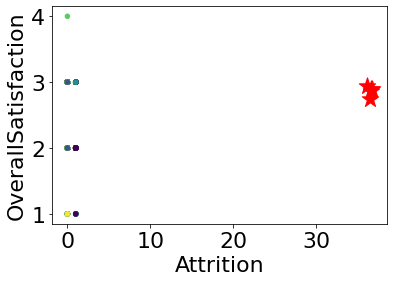

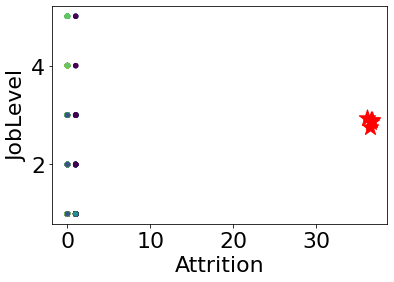

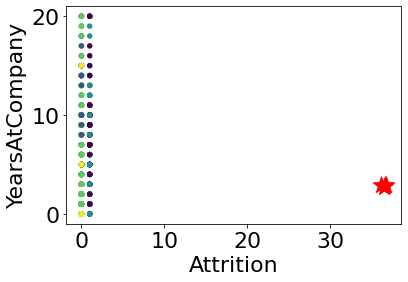

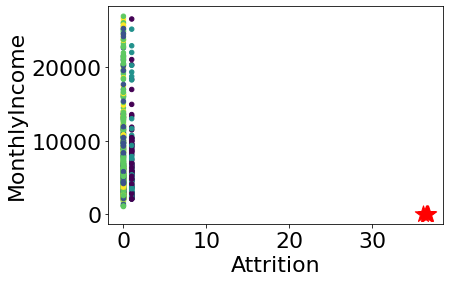

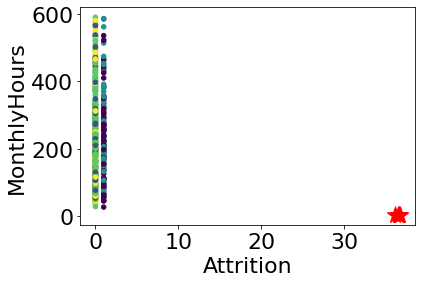

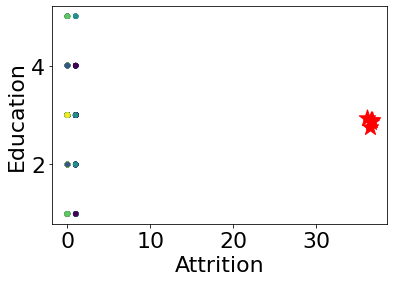

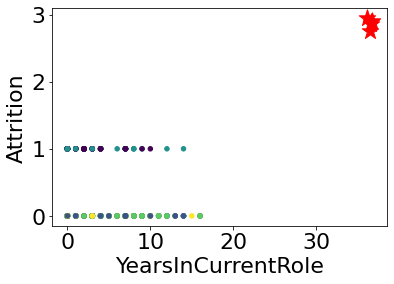

In [28]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'DistanceFromHome'),
                    ('YearsInCurrentRole', 'MonthlyIncome'), ('Age', 'Attrition'), ('Attrition', 'DistanceFromHome'), 
                    ('Attrition', 'OverTime'), ('Attrition', 'OverallSatisfaction'), ('Attrition', 'JobLevel'),
                    ('Attrition', 'YearsAtCompany'), ('Attrition', 'MonthlyIncome'), ('Attrition', 'MonthlyHours'),
                    ('Attrition', 'Education'), ('YearsInCurrentRole', 'Attrition')]

for a, b in features_to_plot:
    plt.scatter(df_NN[a], df_NN[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 14], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

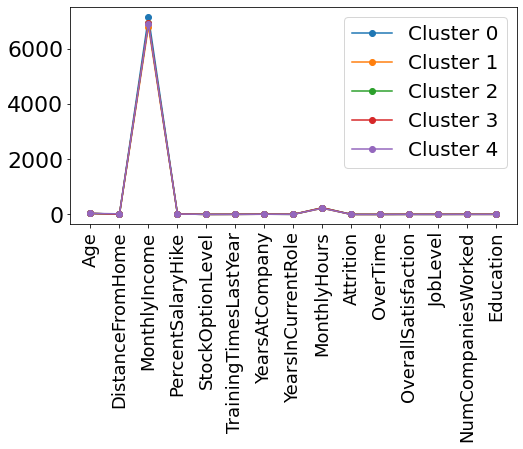

In [29]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_NN.columns)), df_NN.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

In [30]:
df_NN['Labels'] = df['Labels']

In [31]:
df_NN

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0     52                 9           8446                 17   
1     36                 1           4834                 14   
2     25                16           4768                 25   
3     33                 5           2799                 14   
4     31                 9           6319                 12   
..   ...               ...            ...                ...   
878   38                12           5343                 15   
879   37                16           2115                 13   
880   33                 6           5147                 18   
881   33                 4           2500                 12   
882   45                 3           4385                 16   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0                   0                      2               8   
1                   1                      3               1   
2                   1                      4               1   
3                   0                      1               3   
4                   0                      2              10   
..                ...                    ...             ...   
878                 0                      2              10   
879                 2                      3              17   
880                 0                      2              11   
881                 0                      2               3   
882                 0                      2              10   

     YearsInCurrentRole  MonthlyHours  Attrition  OverTime  \
0                     7        156.61          0         0   
1                     8        157.94          0         1   
2                     5        448.06          0         1   
3                     7        271.91          0         0   
4                     2        106.37          0         0   
..                  ...           ...        ...       ...   
878                   0        282.47          1         0   
879                   0         76.29          0         1   
880                   7        272.88          1         1   
881                   2        208.67          0         0   
882                   4        209.73          0         1   

     OverallSatisfaction  JobLevel  NumCompaniesWorked  Education  Labels  
0                      2         3                   9          4       3  
1                      2         5                   1          1       1  
2                      3         2                   1          3       1  
3                      2         1                   2          4       3  
4                      3         1                   1          2       3  
..                   ...       ...                 ...        ...     ...  
878                    3         1                   1          3       2  
879                    3         1                   1          2       1  
880                    2         2                   4          4       0  
881                    2         2                   1          1       3  
882                    2         2                   3          4       1  

[883 rows x 16 columns]

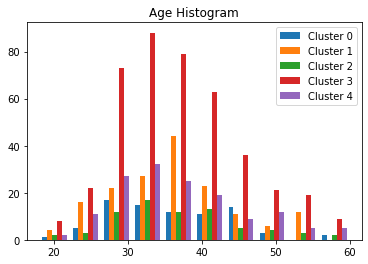

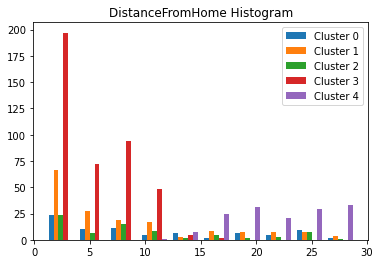

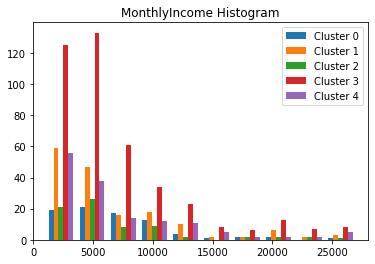

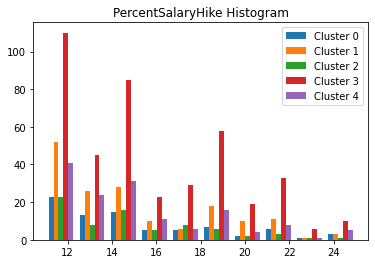

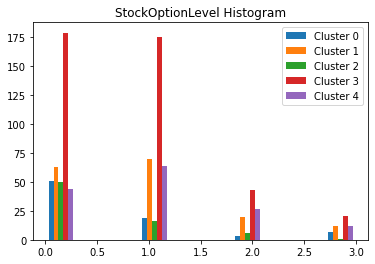

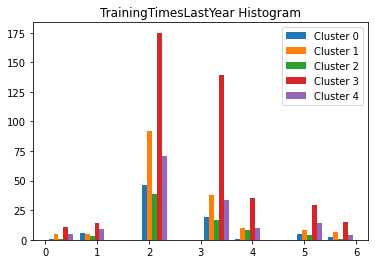

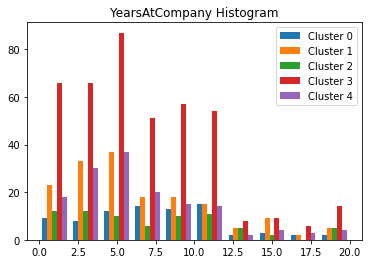

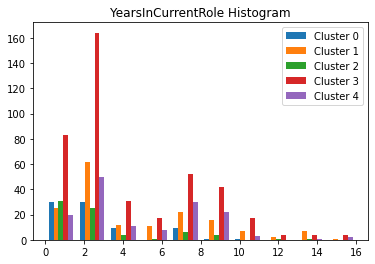

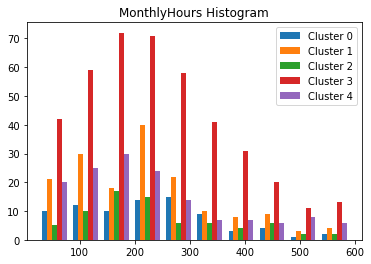

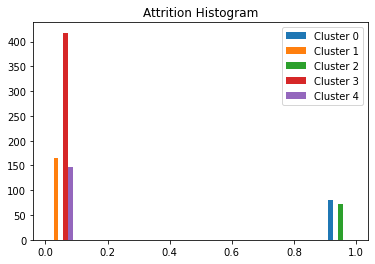

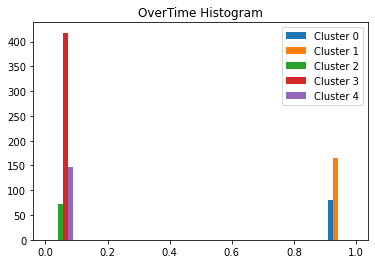

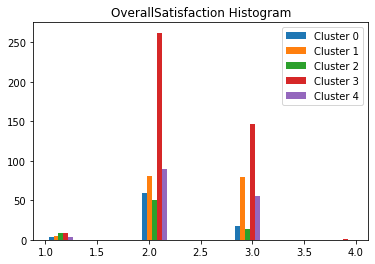

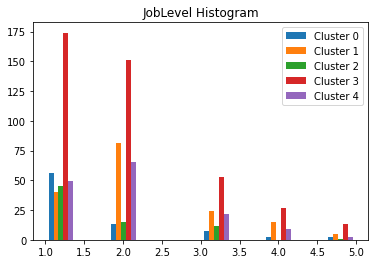

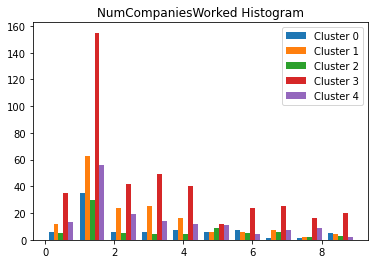

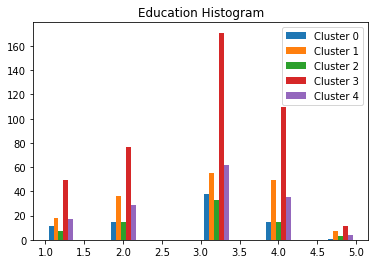

In [33]:
for column in df_NN.columns:
    if column != 'Labels':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NN['Labels']):
            cluster_list.append(df_NN[df_NN['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

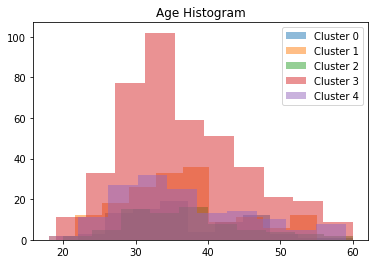

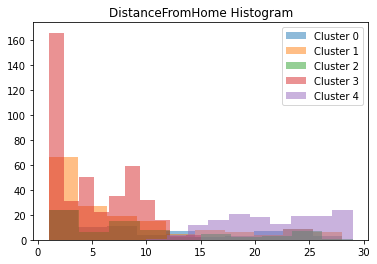

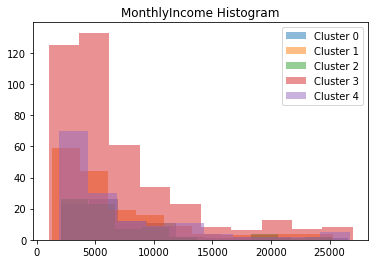

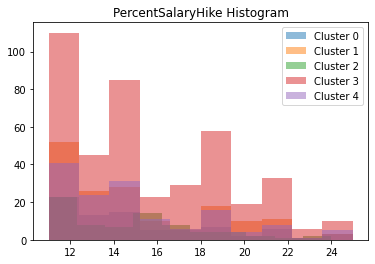

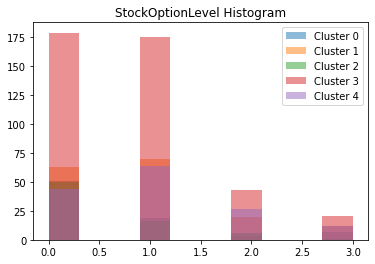

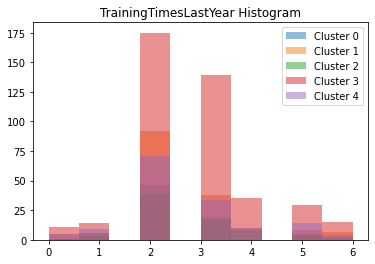

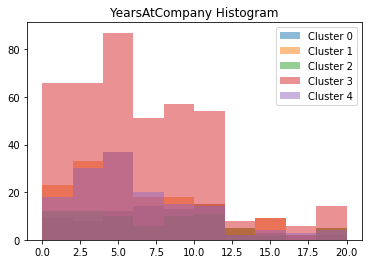

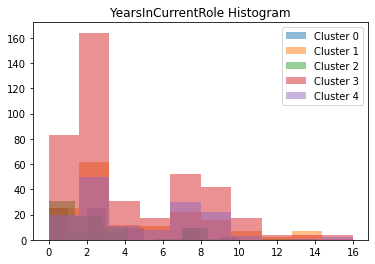

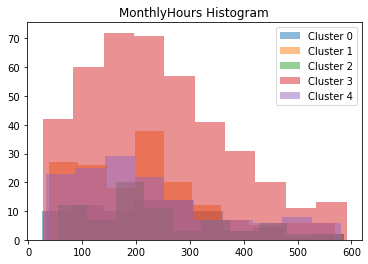

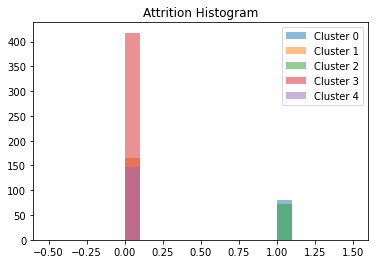

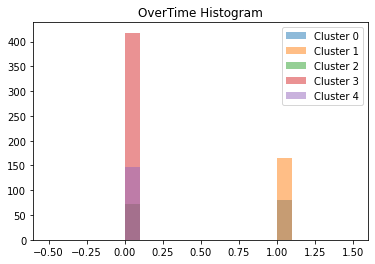

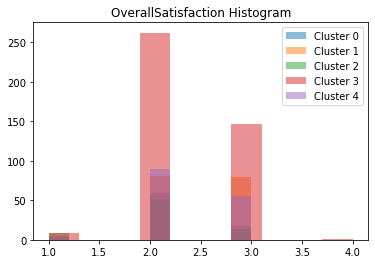

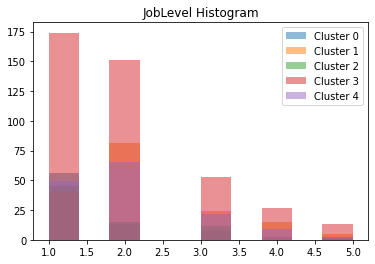

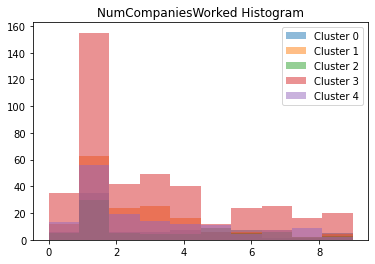

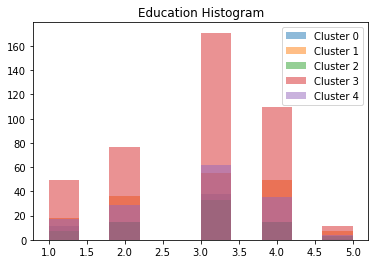

In [34]:
for column in df_NN.columns:
    if column != 'Labels':
    
        for num_cluster in np.unique(df_NN['Labels']):
            plt.hist(df_NN[df_NN['Labels'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

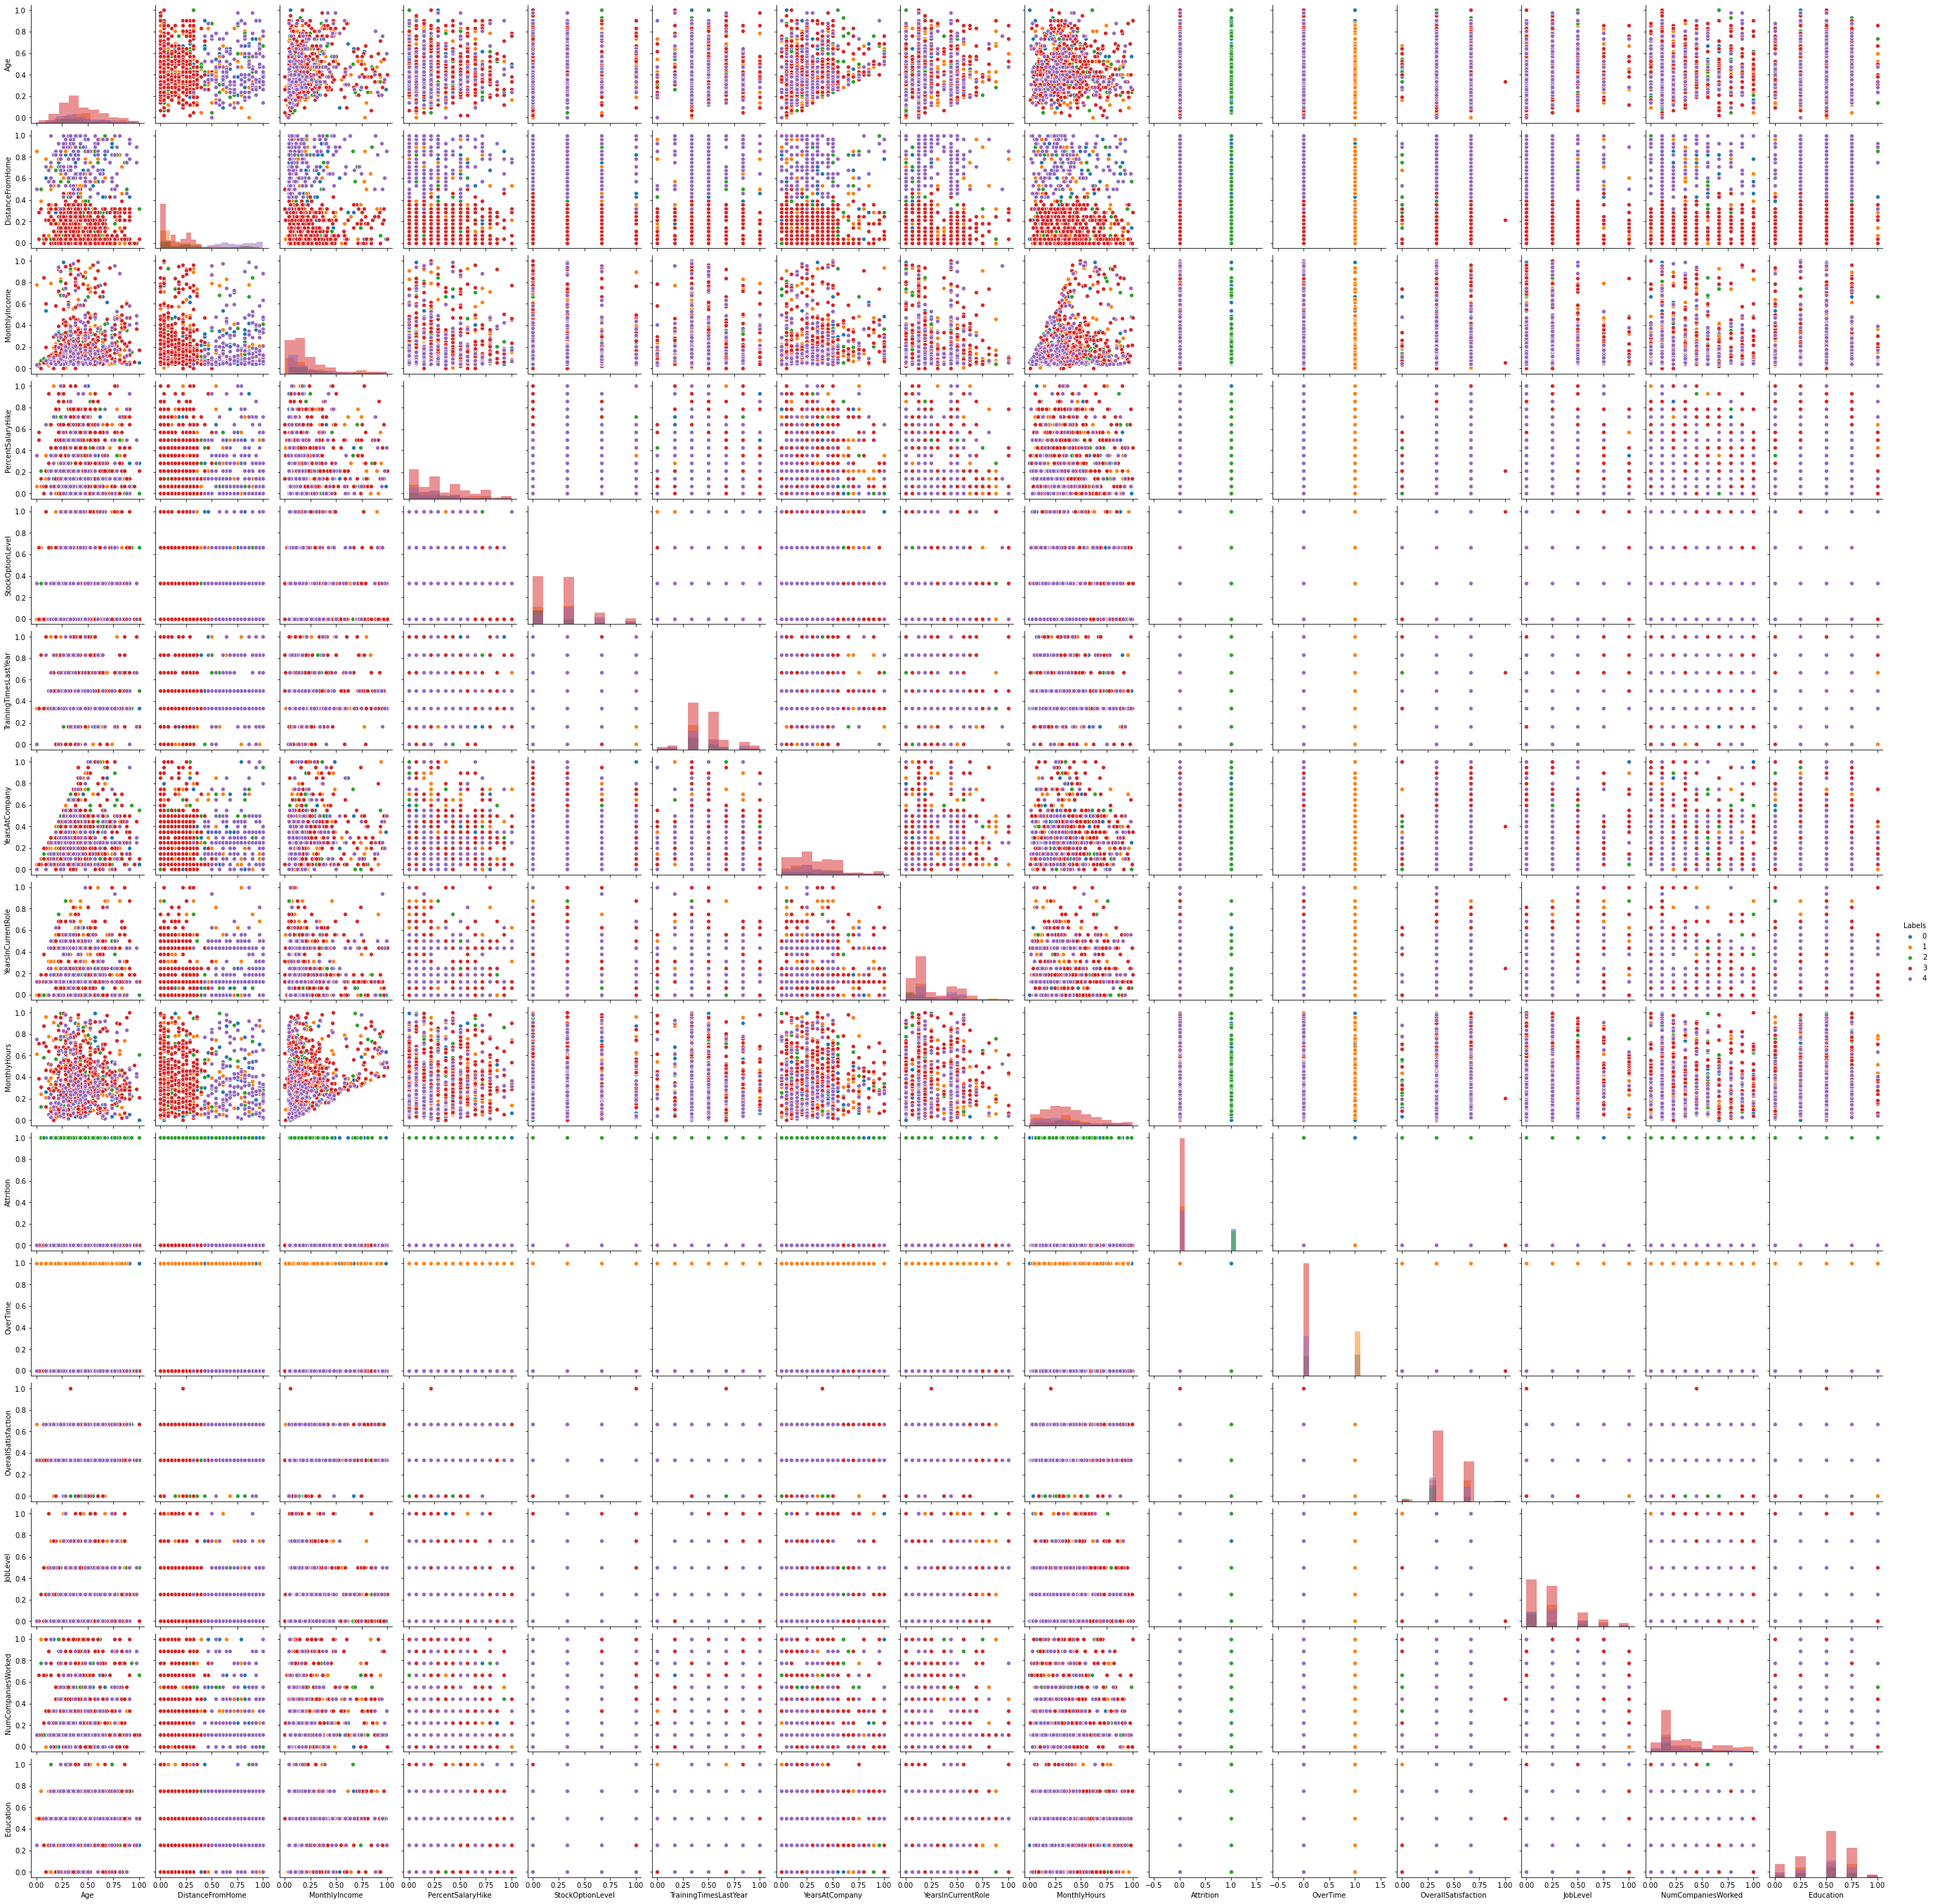

In [35]:
sns.pairplot(df, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")

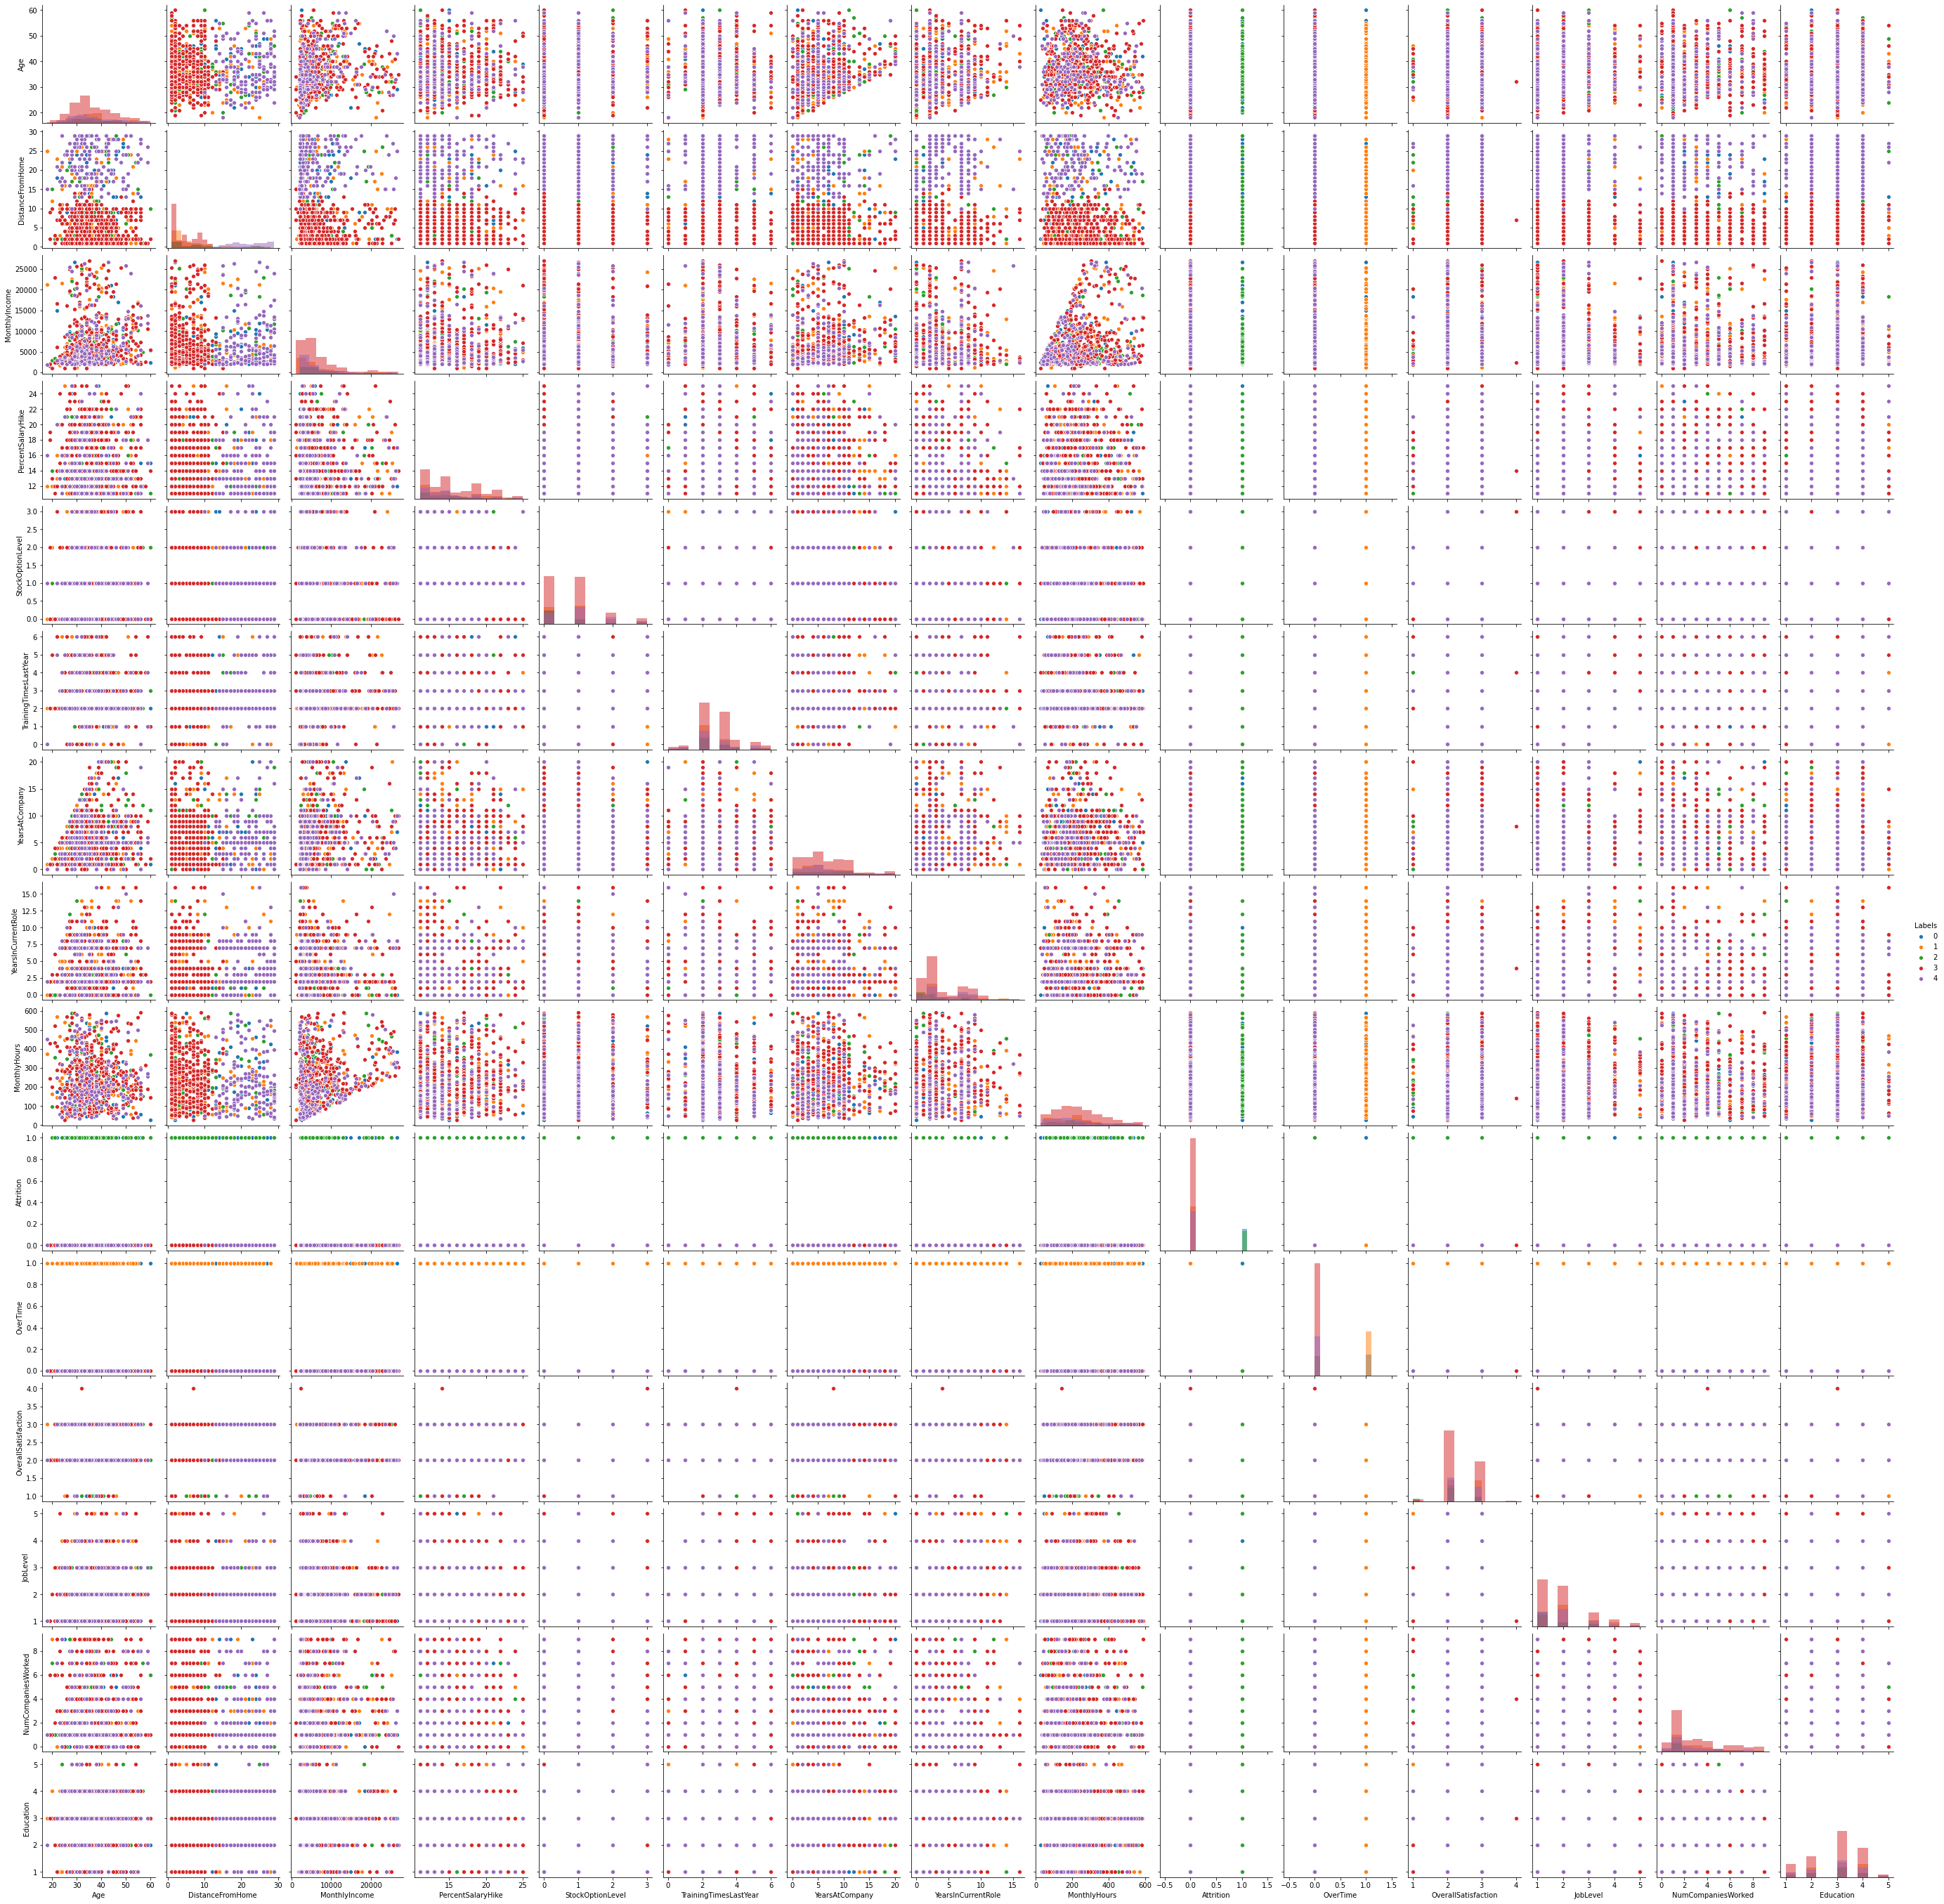

In [36]:
sns.pairplot(df_NN, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")